# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Load the data

In [2]:
nba_data = pd.read_csv('../data/nba_data.csv', index_col=0)

In [3]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 14
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    158 non-null    object 
 1   SEASON  158 non-null    object 
 2   PTS     158 non-null    float64
 3   REB     158 non-null    float64
 4   AST     158 non-null    float64
 5   BLK     158 non-null    float64
 6   STL     158 non-null    float64
 7   G       158 non-null    int64  
 8   FG%     158 non-null    float64
 9   3P%     158 non-null    float64
 10  FT%     158 non-null    float64
 11  TS%     158 non-null    float64
 12  USG%    158 non-null    float64
 13  PER     158 non-null    float64
 14  WS      158 non-null    float64
 15  BPM     158 non-null    float64
 16  VORP    158 non-null    float64
 17  SALARY  158 non-null    float64
dtypes: float64(15), int64(1), object(2)
memory usage: 23.5+ KB


In [4]:
nba_data.head()

,NAME,SEASON,PTS,REB,AST,BLK,STL,G,FG%,3P%,FT%,TS%,USG%,PER,WS,BPM,VORP,SALARY
0,Patrick Patterson,2017-2018,318.0,193.0,57.0,23.0,48.0,82,0.398,0.386,0.870,0.555,10.8,10.0,2.6,-1.3,0.2,4.325064e+06
1,E'Twaun Moore,2017-2018,1022.0,238.0,187.0,12.0,79.0,82,0.508,0.425,0.706,0.593,16.1,12.1,4.4,-0.2,1.2,8.680000e+06
2,Bismack Biyombo,2017-2018,468.0,468.0,66.0,95.0,21.0,82,0.520,0.000,0.650,0.556,14.9,14.1,2.9,-1.6,0.2,1.700000e+07
3,Khris Middleton,2017-2018,1652.0,429.0,328.0,21.0,119.0,82,0.466,0.359,0.884,0.577,24.6,17.4,6.9,0.4,1.8,1.752069e+07
4,Cory Joseph,2017-2018,649.0,263.0,260.0,18.0,80.0,82,0.424,0.353,0.745,0.503,14.8,11.0,3.1,-1.2,0.5,7.472500e+06


# Explore the data

In [5]:
nba_data['SALARY'].describe()

count    1.580000e+02
mean     1.362627e+07
std      8.383003e+06
min      8.673915e+05
25%      7.000000e+06
50%      1.250000e+07
75%      2.074634e+07
max      3.359950e+07
Name: SALARY, dtype: float64

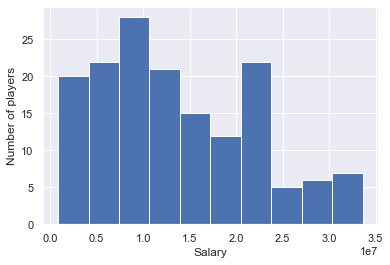

In [6]:
sns.set()
_ = plt.hist(nba_data['SALARY'])
_ = plt.xlabel('Salary')
_ = plt.ylabel('Number of players')
plt.show()

The graph shows that salaries that are greater than \\$25,000,000 are not super common. It makes sense these are typically reserved for All-Star or near-All-Star level players. Then salaries greater than \\$30,000,000 are even rarer. These are the salaries that are reserved for MVP-type players. These salaries are the absolute max that a team could give that players so this is why there aren't any above this. What's interesting is that the histogram peaks at around the \\$7,500,000 to \\$11,000,000 range, steadily declines as the salaries increase then increases dramatically in the \\$21,000,000 to \\$23,500,000 range.

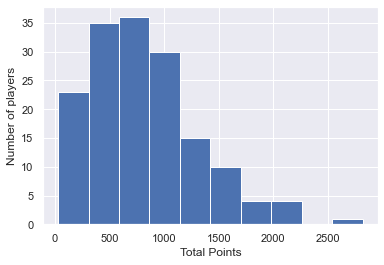

In [7]:
_ = plt.hist(nba_data['PTS'])
_ = plt.xlabel('Total Points')
_ = plt.ylabel('Number of players')
plt.show()

I decided to use total points as opposed to points-per-game (ppg) since ppg can be decpetive. There can be a player that statistically averaged 20 ppg but could've played a total of two games in a season and scored 10 points in those two games. That being said, there are a lot of players that scored less than 300 total points over the course of an entire season. Also, it seems like most players fall just below the 1,100 total points scored. A lot of these players are role-player types that are there to complement the star players. As expected, as the total points increases the number of players decreases and it seems like there was only one player that scored more than 2500 total points in a season and that player is...

In [8]:
nba_data[nba_data['PTS']>2500]

,NAME,SEASON,PTS,REB,AST,BLK,STL,G,FG%,3P%,FT%,TS%,USG%,PER,WS,BPM,VORP,SALARY
23,James Harden,2018-2019,2815.8,514.8,585.0,54.6,156.0,78,0.442,0.368,0.879,0.616,39.5,30.6,15.2,11.7,9.9,30902124.75


James Harden, in the 2018-2019 season, scored approximately 2800 total points. That equates to over 36 ppg when games played (G) is taken into consideration. He is also a member of the exclusive "makes over \\$30,000,000" club.

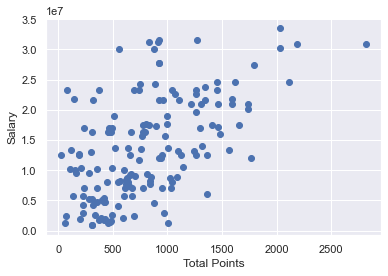

In [9]:
_ = plt.scatter(nba_data['PTS'],nba_data['SALARY'])
_ = plt.xlabel('Total Points')
_ = plt.ylabel('Salary')
plt.show()

This shows a general trend of high scorers getting high salaries. However, there seems to be high variance of scoring amongst the top earners.

In [10]:
nba_data[nba_data['SALARY']>30000000]

,NAME,SEASON,PTS,REB,AST,BLK,STL,G,FG%,3P%,FT%,TS%,USG%,PER,WS,BPM,VORP,SALARY
13,Russell Westbrook,2017-2018,2028.0,804.0,820.0,20.0,147.0,80,0.449,0.298,0.737,0.524,34.1,24.7,10.1,8.2,7.5,3.016817e+07
17,Kyle Lowry,2017-2018,1267.0,434.0,537.0,19.0,85.0,78,0.427,0.399,0.854,0.598,21.7,19.5,10.2,5.9,5.0,3.163333e+07
36,James Harden,2017-2018,2191.0,389.0,630.0,50.0,126.0,72,0.449,0.367,0.858,0.619,36.1,29.8,15.4,10.9,8.3,3.090212e+07
73,Paul Millsap,2017-2018,555.0,245.0,105.0,44.0,39.0,38,0.464,0.345,0.696,0.549,22.0,17.0,2.5,0.7,0.8,3.011667e+07
18,Gordon Hayward,2018-2019,828.0,324.0,244.8,21.6,64.8,72,0.466,0.333,0.834,0.575,18.2,15.6,4.9,0.5,1.2,3.121430e+07
23,James Harden,2018-2019,2815.8,514.8,585.0,54.6,156.0,78,0.442,0.368,0.879,0.616,39.5,30.6,15.2,11.7,9.9,3.090212e+07
33,Kevin Durant,2018-2019,2028.0,499.2,460.2,85.8,54.6,78,0.521,0.353,0.885,0.631,28.2,24.2,11.5,4.3,4.3,3.359950e+07
37,Kyle Lowry,2018-2019,923.0,312.0,565.5,32.5,91.0,65,0.411,0.347,0.830,0.562,19.0,16.5,6.6,3.1,2.8,3.163333e+07
50,Paul Millsap,2018-2019,882.0,504.0,140.0,56.0,84.0,70,0.484,0.365,0.727,0.570,19.0,17.9,6.1,2.4,2.1,3.011667e+07
8,Gordon Hayward,2019-2020,910.0,348.4,213.2,20.8,36.4,52,0.500,0.383,0.855,0.595,21.1,18.1,5.7,2.7,2.0,3.121430e+07


All of these players apart from Paul Millsap are considered All-Star or near-All-Star level players.

In [11]:
nba_data['G'].describe()

count    158.000000
mean      62.202532
std       17.887390
min        9.000000
25%       53.250000
50%       67.500000
75%       76.000000
max       82.000000
Name: G, dtype: float64

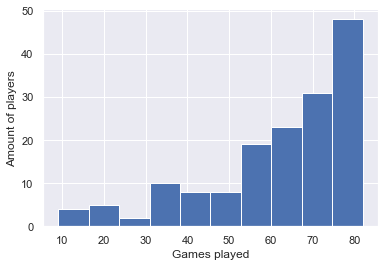

In [12]:
_ = plt.hist(nba_data['G'])
_ = plt.xlabel('Games played')
_ = plt.ylabel('Amount of players')
plt.show()

The average number of games played by the players in the data set was just over 62 games. For reference, in a normal season, which all three season included in the data set are, there are 82 games in a season. So on average, these players played just over 75% of their games which is pretty good considering injuries are a common occurance in an NBA season.

#### Principle component analysis (PCA)

I won't include the Salary column in the DataFrame that will be scaled so that it can be used to identify the larger salaries from the smaller ones. This is also the reason why the salaries in the Salary column have been divided by 1,000,000.

In [13]:
nba_data_scaled = nba_data.set_index(['NAME','SEASON'])
nba_data_index = nba_data_scaled.index                    # save the index names
nba_data_salaries = nba_data_scaled['SALARY']/1000000     # divide salaries by $1,000,000 and save the salaries column
del nba_data_scaled['SALARY']                             # delete salary column
nba_data_columns = nba_data_scaled.columns                # save the column names
nba_data_scaled.head()

,,PTS,REB,AST,BLK,STL,G,FG%,3P%,FT%,TS%,USG%,PER,WS,BPM,VORP
NAME,SEASON,,,,,,,,,,,,,,,
Patrick Patterson,2017-2018,318.0,193.0,57.0,23.0,48.0,82,0.398,0.386,0.870,0.555,10.8,10.0,2.6,-1.3,0.2
E'Twaun Moore,2017-2018,1022.0,238.0,187.0,12.0,79.0,82,0.508,0.425,0.706,0.593,16.1,12.1,4.4,-0.2,1.2
Bismack Biyombo,2017-2018,468.0,468.0,66.0,95.0,21.0,82,0.520,0.000,0.650,0.556,14.9,14.1,2.9,-1.6,0.2
Khris Middleton,2017-2018,1652.0,429.0,328.0,21.0,119.0,82,0.466,0.359,0.884,0.577,24.6,17.4,6.9,0.4,1.8
Cory Joseph,2017-2018,649.0,263.0,260.0,18.0,80.0,82,0.424,0.353,0.745,0.503,14.8,11.0,3.1,-1.2,0.5


In [14]:
nba_data_scaled = scale(nba_data_scaled) # scale the DataFrame

In [15]:
nba_data_scaled_df = pd.DataFrame(nba_data_scaled, columns=nba_data_columns)
nba_data_scaled_df.head()

,PTS,REB,AST,BLK,STL,G,FG%,3P%,FT%,TS%,USG%,PER,WS,BPM,VORP
0,-0.983256,-0.613091,-0.819306,-0.379747,-0.144697,1.110303,-1.050468,0.480695,0.973125,-0.209301,-1.619851,-1.142453,-0.534710,-0.610591,-0.646831
1,0.429990,-0.387405,0.091729,-0.693853,0.806229,1.110303,0.622963,0.794937,-0.732592,0.582036,-0.667078,-0.736948,0.050856,-0.234809,-0.048474
2,-0.682139,0.766101,-0.756235,1.676222,-0.972923,1.110303,0.805519,-2.629493,-1.315032,-0.188476,-0.882800,-0.350753,-0.437115,-0.713076,-0.646831
3,1.694685,0.570506,1.079852,-0.436857,2.033230,1.110303,-0.015983,0.263143,1.118735,0.248841,0.860955,0.286469,0.864142,-0.029838,0.310540
4,-0.318790,-0.262024,0.603310,-0.522523,0.836904,1.110303,-0.654929,0.214798,-0.326964,-1.292183,-0.900777,-0.949356,-0.372053,-0.576429,-0.467324


In [16]:
nba_pca = PCA().fit(nba_data_scaled) # fit the PCA transformation

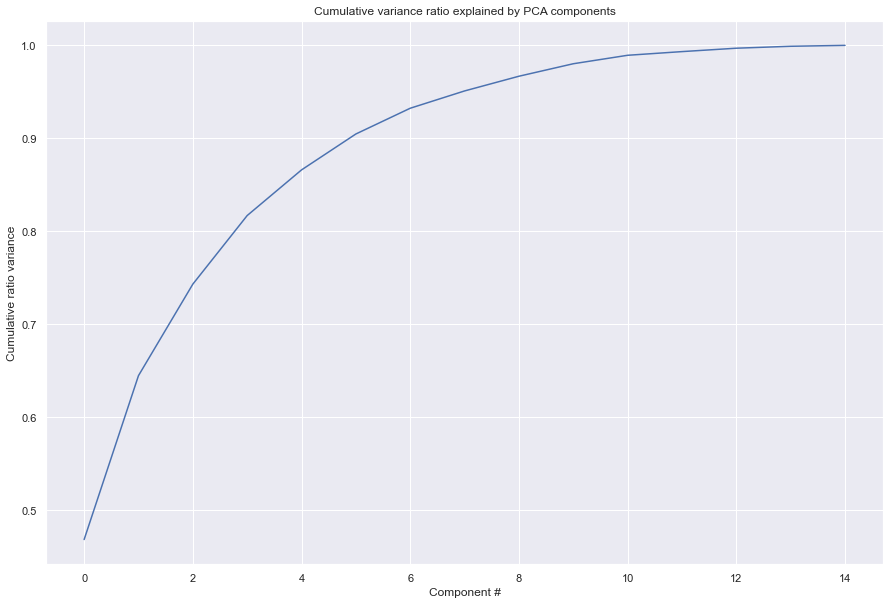

In [17]:
# plot the cumulative variance ratio with number of components
_ = plt.subplots(figsize=(15, 10))
_ = plt.plot(nba_pca.explained_variance_ratio_.cumsum())
_ = plt.xlabel('Component #')
_ = plt.ylabel('Cumulative ratio variance')
_ = plt.title('Cumulative variance ratio explained by PCA components');

The first two components seem to account for right around 65% of the variance, and the first six for just over 90%.

In [18]:
# apply the transformation to the data to obtain the derived features
nba_pca_x = nba_pca.transform(nba_data_scaled)
nba_pca_x.shape

(158, 15)

Text(0.5, 1.0, 'NBA data PCA, 64.5% variance explained')

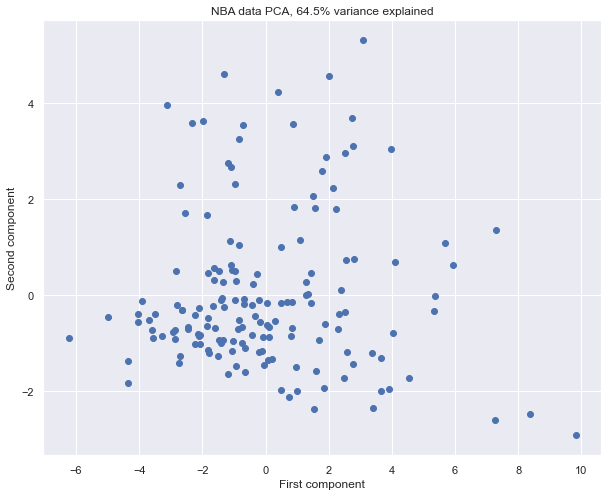

In [19]:
# plot the first two derived features (the first two principle components)
x = nba_pca_x[:, 0]
y = nba_pca_x[:, 1]
player = nba_data_index
pc_var = 100 * nba_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'NBA data PCA, {pc_var:.1f}% variance explained')
#for p, x, y in zip(player, x, y):
#    plt.annotate(p, (x, y))

There is a cluster of players in the bottom left of the graph between -4 and 4 from the First component and between -2 and 1 from the Second component. That being said there is a lot of variance in both dimensions.

In [20]:
# create a new DataFrame with the first two derived features, the salaries, and the quartiles each salary falls into
nba_pca_df = pd.DataFrame({'PC1': nba_pca_x[:, 0], 'PC2': nba_pca_x[:, 1]}, index=nba_data_index)
nba_pca_df = pd.concat([nba_pca_df, nba_data_salaries], axis=1)
nba_pca_df['Quartile'] = pd.qcut(nba_pca_df.SALARY, q=4, precision=1)
nba_pca_df.head()

,,PC1,PC2,SALARY,Quartile
NAME,SEASON,,,,
Patrick Patterson,2017-2018,-2.110931,-0.849125,4.325064,"(0.8, 7.0]"
E'Twaun Moore,2017-2018,0.036289,-0.167783,8.680000,"(7.0, 12.5]"
Bismack Biyombo,2017-2018,-0.854357,3.247767,17.000000,"(12.5, 20.7]"
Khris Middleton,2017-2018,2.489798,-1.724182,17.520690,"(12.5, 20.7]"
Cory Joseph,2017-2018,-1.077632,-1.170750,7.472500,"(7.0, 12.5]"


Text(0.5, 1.0, 'NBA data PCA, 64.5% variance explained')

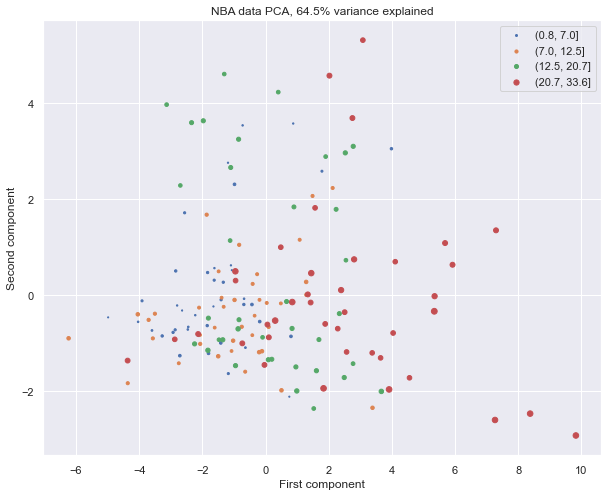

In [21]:
# plot the first two principle components with each points size and color determined by the quartile they fall into
x = nba_pca_df.PC1
y = nba_pca_df.PC2
salary = nba_pca_df.SALARY
quartiles = nba_pca_df.Quartile
player = nba_pca_df.index
pc_var = 100 * nba_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=salary[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'NBA data PCA, {pc_var:.1f}% variance explained')
#for p, x, y in zip(player, x, y):
#    plt.annotate(p, (x, y))

The legend categories are the quartiles of the salaries in millions of dollars. For example, the first category is from \\$800,000 to \\$7,000,000. That cluster mentioned earlier in the bottom left of the grpah seems to be made up of contracts from each quartile. Also, it seems like the largest salaries tend to be on the right side of the graph. There is also more spread of points across the first component as opposed to the second component where the bulk of the point rest towards the bottom of the graph.

#### Pairplot

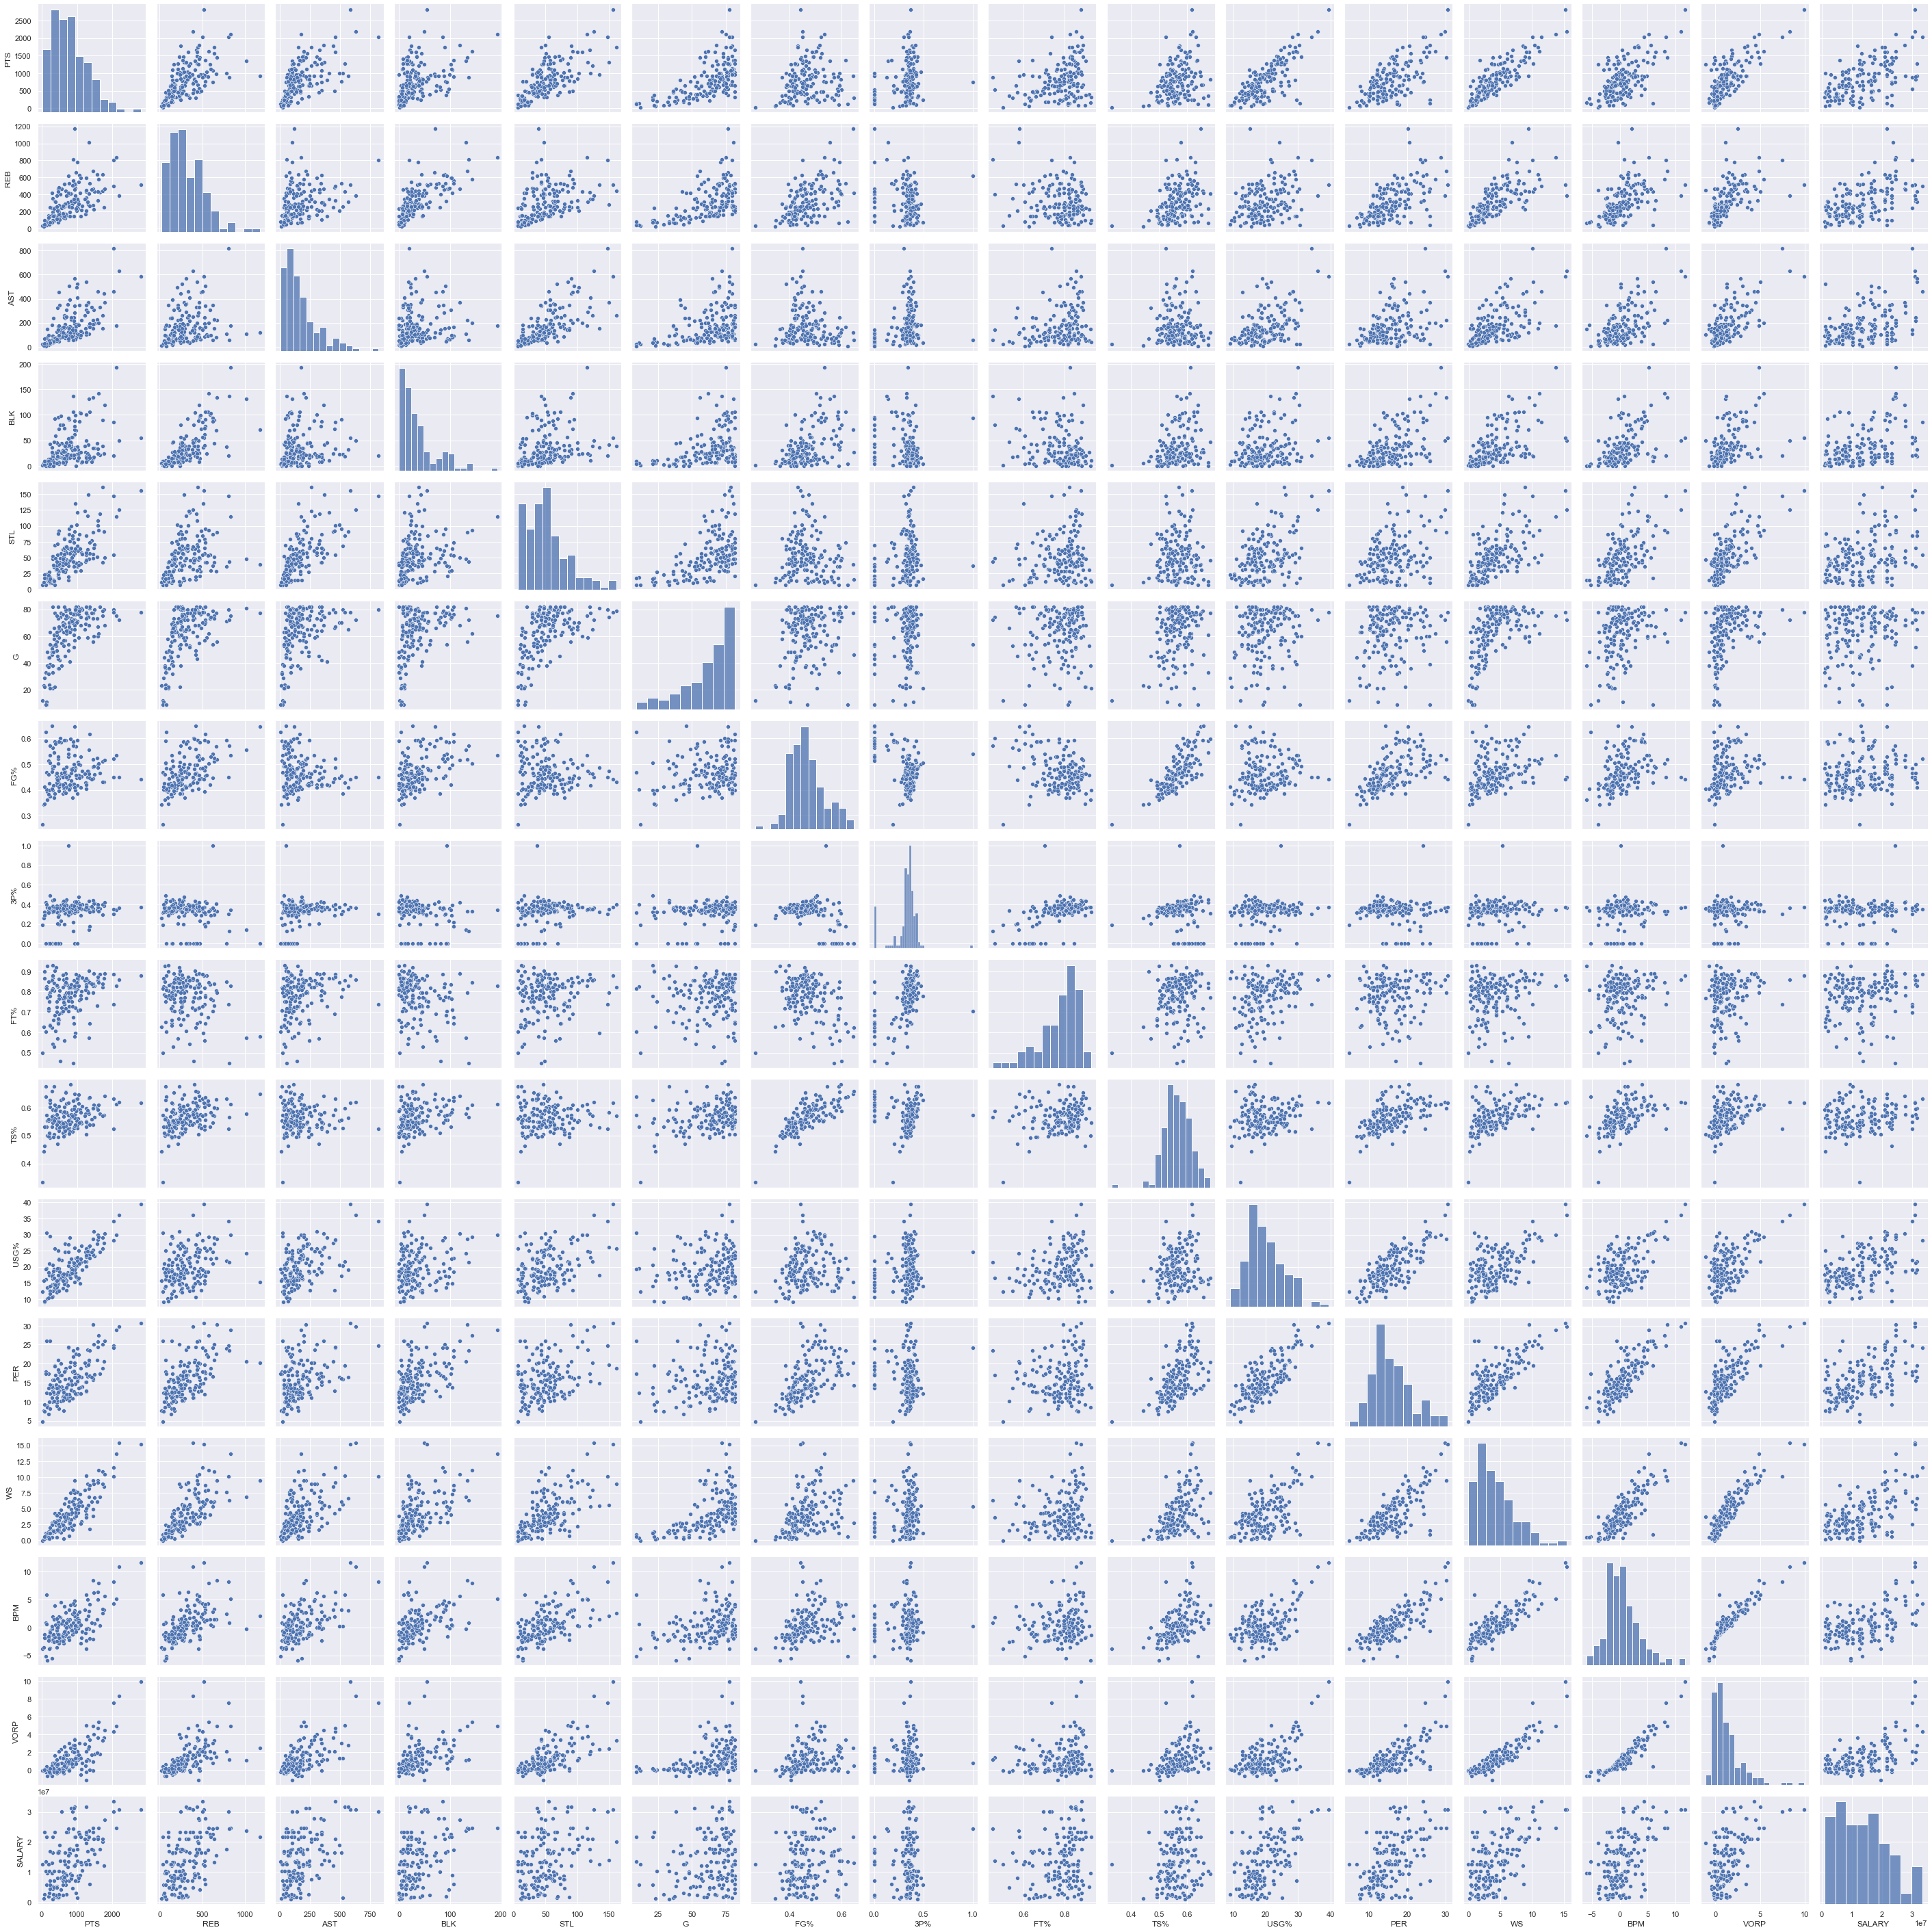

In [22]:
sns.pairplot(nba_data)

At first glance it seems like usage rate (USG%) has positive correlations with several features. The most obvious one is points which makes a lot of sense. Usage rate is essentially how much a player has the ball in their hands so the higher this goes the more points the player scores. Player efficiency rating is also postively correlated with usage rate. This also makes a lot of sense since PER is a way of measuring a players production on a per-minute basis. There also seems to be positive correlation between usage rate and win shares (WS), box plus-minus (BPM) and value over replacement player (VORP). However, for these three advanced stats, the vast majority of the players are clustered towards the bottom left. PER, BPM, VORP, and PER are all positively correlated with one another. Additionally, Salary is positively corralated with those 4 stats and with usage rate. All five of these stats are considered advanced stats and their positive correlation with salary indicate that teams clearly pay more for efficient and winning players. Total points also seems to be positiviely correlated with salary. Interestingly, there may not be any correlation between salary and each of total rebounds (REB), total assisits (AST), total blocks (BLK), and total steals (STL).

#### Heatmap

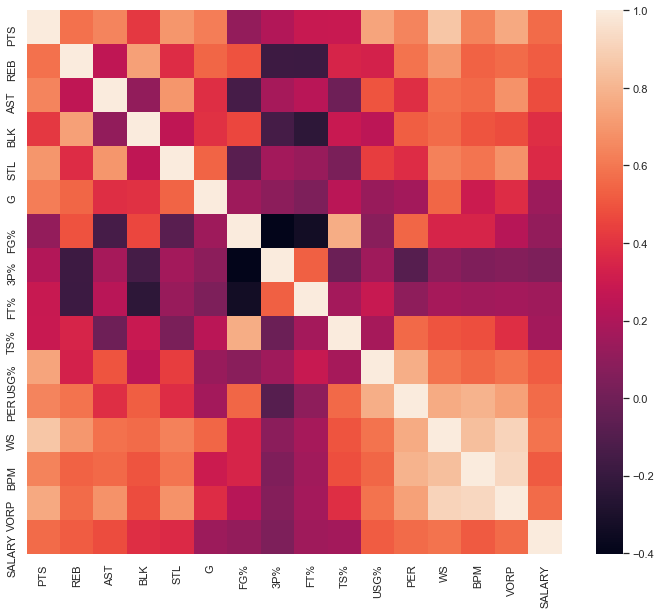

In [23]:
plt.subplots(figsize=(12,10))
sns.heatmap(nba_data.corr());

As pointed out above in the pairplot section and shown here, the 4 advanced stats that include PER, WS, BPM and VORP are all positively correlated with each other. Win shares (WS) also seem to be positively correlated with total points (PTS).

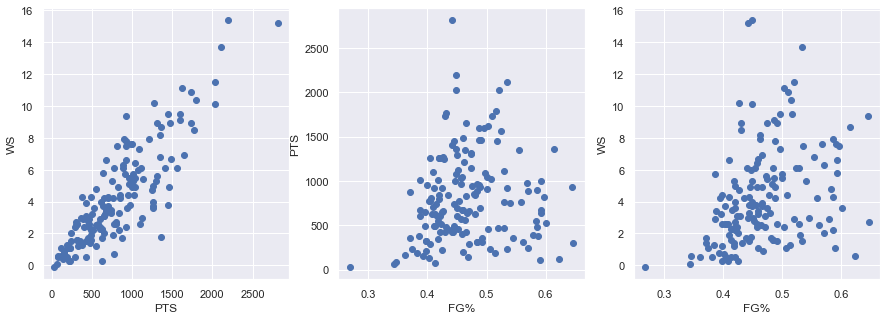

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
_ = plt.scatter(x=nba_data['PTS'], y=nba_data['WS'])
plt.xlabel('PTS')
plt.ylabel('WS')
plt.subplot(1,3,2)
_ = plt.scatter(x=nba_data['FG%'], y=nba_data['PTS'])
plt.xlabel('FG%')
plt.ylabel('PTS')
plt.subplot(1,3,3)
_ = plt.scatter(x=nba_data['FG%'], y=nba_data['WS'])
plt.xlabel('FG%')
plt.ylabel('WS')
plt.show()

Win shares is an estimate of the number of wins contributed by a player which means that generally speaking the more a player scores in a season the more wins they contribute to the team. I plotted PTS vs FG% and WS vs FG% to compare those three statistics. Win shares is a great way to distinguish elite players from the rest. I wanted to see if players with relatively low or average field goal percentages can have high win shares. Based on these results, it seems like players can't have low field goal percentages and have high win shares.

In [25]:
nba_data[(nba_data['WS']>10) & (nba_data['PTS']>1500)]

,NAME,SEASON,PTS,REB,AST,BLK,STL,G,FG%,3P%,FT%,TS%,USG%,PER,WS,BPM,VORP,SALARY
13,Russell Westbrook,2017-2018,2028.0,804.0,820.0,20.0,147.0,80,0.449,0.298,0.737,0.524,34.1,24.7,10.1,8.2,7.5,3.016817e+07
25,Anthony Davis,2017-2018,2110.0,832.0,174.0,193.0,115.0,75,0.534,0.340,0.828,0.612,30.0,28.9,13.7,5.2,4.9,2.460488e+07
27,LaMarcus Aldridge,2017-2018,1735.0,635.0,152.0,90.0,43.0,75,0.510,0.293,0.837,0.570,29.1,25.0,10.9,3.3,3.3,2.101801e+07
36,James Harden,2017-2018,2191.0,389.0,630.0,50.0,126.0,72,0.449,0.367,0.858,0.619,36.1,29.8,15.4,10.9,8.3,3.090212e+07
45,Kevin Durant,2017-2018,1792.0,464.0,366.0,119.0,50.0,68,0.516,0.419,0.889,0.640,30.4,26.0,10.4,5.6,4.5,2.750000e+07
23,James Harden,2018-2019,2815.8,514.8,585.0,54.6,156.0,78,0.442,0.368,0.879,0.616,39.5,30.6,15.2,11.7,9.9,3.090212e+07
33,Kevin Durant,2018-2019,2028.0,499.2,460.2,85.8,54.6,78,0.521,0.353,0.885,0.631,28.2,24.2,11.5,4.3,4.3,3.359950e+07
6,Anthony Davis,2019-2020,1618.2,576.6,198.4,142.6,93.0,62,0.503,0.330,0.846,0.610,29.3,27.4,11.1,8.0,5.4,2.460488e+07


The results above show players that have win shares higher than 10 and over 1500 total points. These are all elite players. The lowest field goal percentage of all these players is James Harden in the 2018-2019 season. This was the season after Harden won his MVP award.

Another positively correlation occurs between true shooting percentage (TS%) and field goal percentage (FG%).

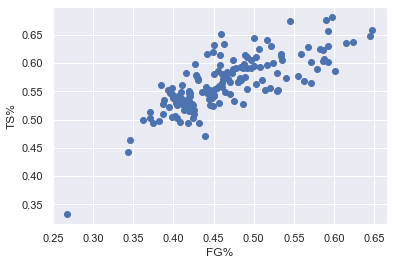

In [26]:
_ = plt.scatter(x=nba_data['FG%'], y=nba_data['TS%'])
plt.xlabel('FG%')
plt.ylabel('TS%')
plt.show()

True shooting percentage takes into account all field goals and free throws. It also takes into consideration the fact that 2-pointers are wirth two points and 3-pointers are worth three points and even that each free throw is only worth one point. Field goal percentage on the other hand doesn't differentiate between the different values of 2 and 3-pointers. To this stat a shot attempt is a shot attempt. It also doesn't take free throws into consideration. All this being said, it makes total sense that as one of these stats increases as does the other since, in a way, they are both describing the same thing in two slightly different ways.

On the subject of shooting percentages, according to the heatmap 3-point percenatge (3P%) and free throw percentage (FT%) are both negatively correlated with field goal percentage (FG%). However, looking at the scatter plots for 3P% vs FG% and FT% vs FG% it doesn't look correlated at all.

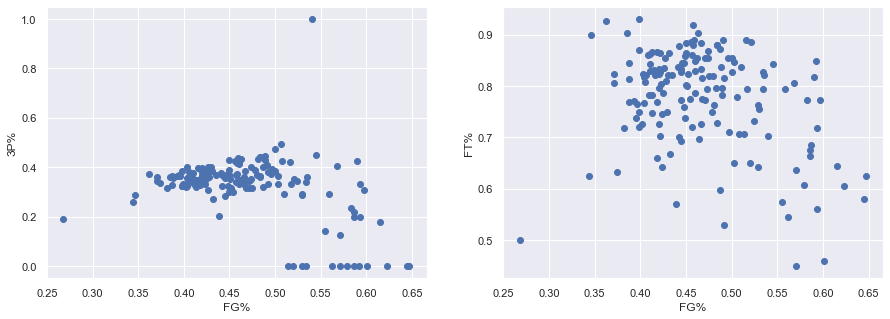

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
_ = plt.scatter(x=nba_data['FG%'], y=nba_data['3P%'])
plt.xlabel('FG%')
plt.ylabel('3P%')
plt.subplot(1,2,2)
_ = plt.scatter(x=nba_data['FG%'], y=nba_data['FT%'])
plt.xlabel('FG%')
plt.ylabel('FT%')
plt.show()

In each plot there is a cluster that encompasses most of the points. For the scatter plot with 3P% (left), it seems like most of the points linger at around the 0.35 mark while there quite a large variance across the FG% axis. What is perhaps causing the negative correlation are all the 0.0 or near 0.0 3P% points. There are more than a few of them. As for the scatter plot with FT% (right), there does appear to be a trend. The higher the field goal percentage (FG%) the lower the free throw percentage (FT%). The best way to possibly explain this is that centers, especially of the traditional variety, tend to have higher field goal percentage because most, if not all, of their shots are near the basket. However, traditional centers also tend to have low free throw percentages.

In [28]:
nba_data[(nba_data['FT%']<0.7) & (nba_data['FG%']>0.55)]

,NAME,SEASON,PTS,REB,AST,BLK,STL,G,FG%,3P%,FT%,TS%,USG%,PER,WS,BPM,VORP,SALARY
7,Dwight Howard,2017-2018,1347.0,1012.0,105.0,131.0,48.0,81,0.555,0.143,0.574,0.577,24.2,20.5,6.8,-0.3,1.1,2.375224e+07
23,DeAndre Jordan,2017-2018,927.0,1171.0,117.0,71.0,39.0,77,0.645,0.000,0.580,0.648,15.2,20.2,9.4,2.1,2.5,2.159856e+07
28,Mason Plumlee,2017-2018,524.0,400.0,142.0,81.0,49.0,74,0.601,0.000,0.458,0.586,16.6,16.9,3.6,1.8,1.4,1.366667e+07
65,Tristan Thompson,2017-2018,307.0,352.0,33.0,17.0,16.0,53,0.562,0.000,0.544,0.569,12.6,13.6,2.5,-2.5,-0.1,1.639983e+07
67,Tyson Chandler,2017-2018,300.0,418.0,53.0,27.0,16.0,46,0.647,0.000,0.624,0.658,10.6,14.2,2.7,-0.3,0.5,1.300000e+07
4,Bismack Biyombo,2018-2019,237.6,248.4,32.4,43.2,10.8,54,0.571,0.000,0.637,0.602,12.6,14.4,2.0,-1.1,0.2,1.700000e+07
8,Derrick Favors,2018-2019,896.8,562.4,91.2,106.4,53.2,76,0.586,0.218,0.675,0.624,18.5,21.8,7.9,4.3,2.8,1.727500e+07
10,Dwight Howard,2018-2019,115.2,82.8,3.6,3.6,7.2,9,0.623,0.000,0.604,0.638,19.2,17.4,0.6,-5.2,-0.2,1.341074e+07
20,Hassan Whiteside,2018-2019,885.6,813.6,57.6,136.8,43.2,72,0.571,0.125,0.449,0.564,21.4,23.5,6.3,0.8,1.2,2.435488e+07
22,Jahlil Okafor,2018-2019,483.8,277.3,41.3,41.3,17.7,59,0.586,0.200,0.663,0.603,19.6,17.9,2.2,-2.3,-0.1,1.634746e+06


This confirms my suspicion. After filtering for players with a free throw percentage lower than 0.70 and a field goal percentage higher than 0.55, we get a list of traditional centers.